<ipython-input-4-0ba36cf1251a>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Rating'].apply(lambda x: 1 if x > 3 else 0)


Accuracy: 0.9313824419778002

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.55      0.66       478
           1       0.94      0.98      0.96      3486

    accuracy                           0.93      3964
   macro avg       0.88      0.77      0.81      3964
weighted avg       0.93      0.93      0.93      3964



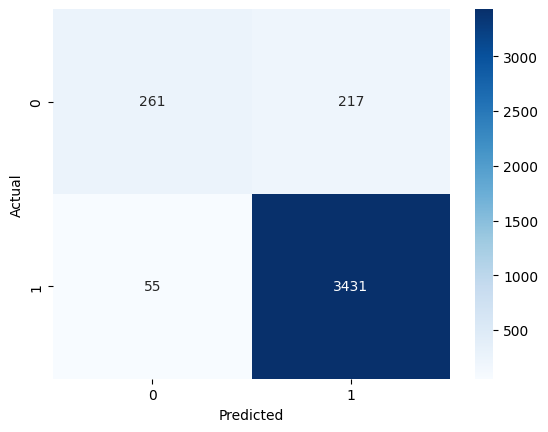

In [ ]:
# Step 1: Import libraries
# Women Clothing Reviews Sentiment Prediction

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load data
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

# Step 3: Clean the data
df = df.dropna(subset=['Review Text'])

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['cleaned_review'] = df['Review Text'].apply(clean_text)

# Step 4: Create Sentiment
df = df[df['Rating'] != 3]
df['Sentiment'] = df['Rating'].apply(lambda x: 1 if x > 3 else 0)

# Step 5: Split data
X = df['cleaned_review']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Vectorize text
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 7: Train model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Step 8: Predict
y_pred = model.predict(X_test_vec)

# Step 9: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 10: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
